# Introduction
The goal of this project is to find the best neighborhood in Pittsburgh based on our chosen metric: walkability. We decided on this because we believe that the ability to safely navigate a neighborhood is a good indicator of how good the neighborhood is as a whole.

# The Metric
Our different datasets that we chose to represent this metric include arrest data, walk scores, sidewalk to street ratios and amount of intersections. My metric was the sidewalk to street ratio which measures the total length of sidewalks and streets in feet for each neighborhood. The ratio is then calculated by dividing the total length of the sidewalks by the total length of the streets for each neighborhood. This data is then represented on a map where the darker the shade of red a neighborhood is, the higher its ratio is. These darker shaded neighborhoods are "better" than the lightly shaded ones because they have a larger quantity of sidewalks than streets, meaning it is safer for people to walk around in that neighborhood.

# The Best Neighborhood
According to my dataset, the best neighborhood is Bedford Dwellings with a ratio of 2.73. This is because it has the highest ratio out of any of the other neighborhoods, as shown by the table at the bottom of the Notebook.

# Conclusion
I am not too familiar with the different neighborhoods in Pittsburgh so I don't really have a personal favorite, so Bedford Dwellings being having the highest ratio doesn't affect me that much.

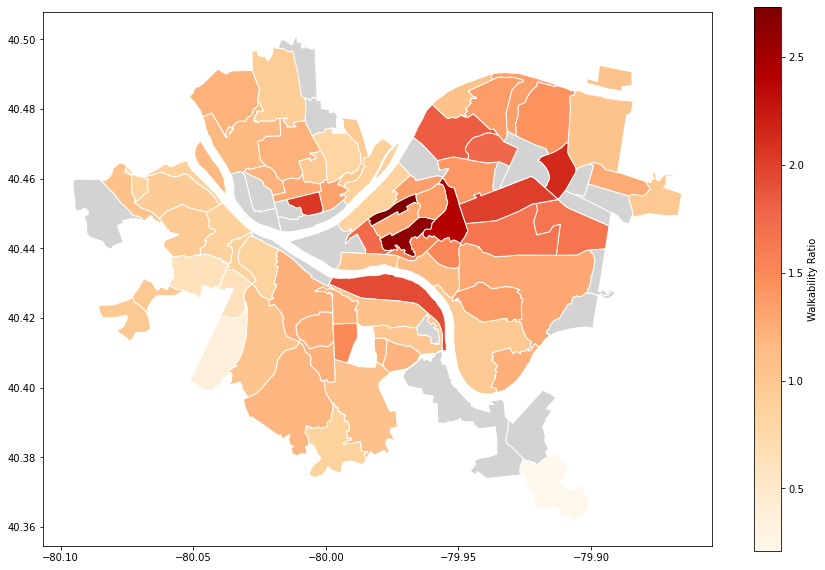

In [5]:
#importing pandas
import pandas as pd
import geopandas as gpd

#creating a function to more easily compare tract numbers from my 2 dataseets
def div(x):
    x = x // 10
    return x

#read in dataset files
neigh = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
steps = pd.read_csv("steps.csv")
ratio = pd.read_csv('sidewalkstreetratio.tsv',sep='\t')

#change name of column to better match the steps file
ratio = ratio.rename(columns={'GEOID':'tract'})
ratio['tract'] = ratio['tract'].apply(div)

#merge both the steps file and ratio file so that I can easily compare the different ratios to the actual names of the neighborhoods
ratioMerge = pd.merge(ratio,steps,left_on="tract",right_on="tract")
sidewalkTotal = ratioMerge.groupby("neighborhood").sum()['SidewalkStepLFt']
streetTotal = ratioMerge.groupby("neighborhood").sum()['StreetLFt']
ratioTotal = sidewalkTotal / streetTotal

#merge the neighborhood shapefile with the dataset from above so that I can plot the ratios on a map
ratGraph = neigh.merge(ratioTotal.rename('Ratio'), how='left', left_on='hood', right_on='neighborhood')
ratGraph.plot(column='Ratio', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Walkability Ratio"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [6]:
#getting the top 5 neighborhoods in terms of ratio metric
ratGraph.sort_values(by='Ratio',ascending=False)[['hood','Ratio']].head()

,hood,Ratio
66,Bedford Dwellings,2.731378
65,Terrace Village,2.630897
1,North Oakland,2.403659
43,Larimer,2.147330
58,Allegheny Center,2.060088


In [7]:
#getting the bottom 5 neighborhoods in terms of ratio metric
#some neighborhoods did not have ratio data so they were removed for this chart
ratGraph.dropna(subset=['Ratio']).sort_values(by='Ratio',ascending=False)[['hood','Ratio']].tail()

,hood,Ratio
6,Spring Hill-City View,0.819535
10,Westwood,0.628763
85,Ridgemont,0.628763
46,Banksville,0.375034
71,Lincoln Place,0.212108
